# Case Study 3 : Analyzing data from MovieLens

**Due Date: Due Date: October 28, by 5:59pm**

**NOTE: There is a break from Oct 14 to Oct 24. To truly take advantage of the break, I would encouage you to ask all the questions before Oct 14 and after October 24, and use the extended break for its intended purpose.** 

## The MovieLens data sets

<img src="https://pbs.twimg.com/profile_images/378800000380161537/b6fa868dce43807d4e67462587d0b0d2_400x400.png">

http://grouplens.org/datasets/movielens/



In [1]:
from IPython.lib.display import YouTubeVideo

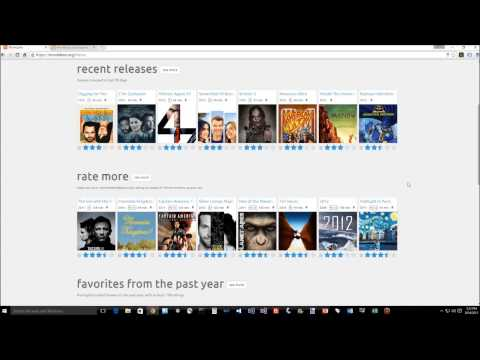

In [2]:
YouTubeVideo('4tW9HY0Q460')

**TEAM Members:** 

Please EDIT this cell and add the names of all the team members in your team:

    1. member 1
    
    2. member 2
    
    3. ...
 
 **Give your group a name**. For example: ***Data Detectives***

**Desired outcome of the case study.**
* In this case study we will look at the MovieLens 1M Data Set.
    * It contains data about users and how they rate movies.
* The idea is to *analyze* the data set, make *conjectures*, support or refute those conjectures with *data*, and *tell a story* about the data!
    
**Required Readings:** 
* Chapter 2 (only the section on the MovieLens 1M Data Set), Chapter 5, Chapter 6,
and Chapter 8 of the book [Python for Data Analysis](http://shop.oreilly.com/product/0636920023784.do)  (available from the WPI library as an e-book).
* If you want your code to be really compact then you might want to also look into the pivot_table method of Panda's DataFrame, though there are many other ways to complete the case study!

**Case study assumptions:**
* You have access to a Python installation

**Required Python libraries:**
* Pandas (pandas.pydata.org)
* Matplotlib (matplotlib.org)
* If you need help installing them then you can refer to the Anaconda documentation of Chapter 1 of Python for Data Analysis book above


# Problem 1 (20 points total): 

## (10 points) Importing the MovieLens data set and merging it into a single Pandas DataFrame

* Download the 1 million ratings data set from http://grouplens.org/datasets/movielens/ (though if you are feeling adventerous you can download the 10 million ratings file instead)
* Merge all of the data into a single Pandas DataFrame
* Store the data into an HDF5 file.

## (10 points) Report some basic details of the data you collected.  For example:

*  How many movies have an average rating over 4.5 overall?
*  How many movies have an average rating over 4.5 among men?  How about women?
*  How many movies have an *median* rating over 4.5 among men over age 30?  How about women over age 30?
*  What are the ten most popular movies?
    * Choose what you consider to be a reasonable defintion of "popular".
    * Be perpared to defend this choice.
*  Make some conjectures about how easy various groups are to please? Support your answers with data!  
    *  For example, one might conjecture that people between the ages of 1 and 10 are the easiest to please since they are all young children.  This conjecture may or may not be true, but how would you support or disprove either conclusion with with data?
    *  Be sure to come up with your own conjectures and support them with data!


In [11]:
import pandas as pd
import numpy as np
import statistics as stats
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

movie = pd.read_table(r'C:/Users/joshu/DS501 Intro To DS/DS501 Graded Assignments/Case Study 3/movies.dat', sep = '::', header = None)
rating = pd.read_table(r'C:/Users/joshu/DS501 Intro To DS/DS501 Graded Assignments/Case Study 3/ratings.dat', sep = '::', header = None)
user = pd.read_table(r'C:/Users/joshu/DS501 Intro To DS/DS501 Graded Assignments/Case Study 3/users.dat', sep = '::', header = None)

movie.columns = ['MovieID', 'Title', 'Genres']
rating.columns = ['UserID', 'MovieID', 'Rating', 'Timestamp']
user.columns = ['UserID', 'Gender', 'Age', 'Occupation', 'Zip-code']

UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe9 in position 3114: invalid continuation byte

In [9]:
movie.head()

NameError: name 'movie' is not defined

In [ ]:
# Turn all the Genres in dataset movie into a list
for i in range(0, len(movie) - 1):
    movie.Genres[i] = movie.Genres[i].split("|")
    i += 1
# Explore Dimension of all 3 data sets
# print(movie.shape) # ncol = 3, nrow = 3883
# print(rating.shape) # ncol = 4, nrow = 1000209
# print(user.shape) # ncol = 5, nrow = 6040

In [ ]:
print(movie.head())
print(rating.head())
print(user.head())

In [ ]:
# To help improve the speed
from numba import jit, njit

In [3]:
# Write Function to count how many rating did each movie receive
def countRating(mID):
    return sum(movie.MovieID[mID] == rating.MovieID)

In [4]:
# Explore unique values of MovieID's in dataset movie and dataset rating 
print(len(movie.MovieID.unique()))
print(len(rating.MovieID.unique()))
# There are 3883 unique values of MovieID in dataset movie, 3706 unique values of MovieID in dataset rating
# Thus, not all movies are rated

NameError: name 'movie' is not defined

In [5]:
# Create feature Counts in dataset movie which indicate number of times a movie is rated
ratingCount = []

for i in range(0, len(movie)):
    c = rating[rating.MovieID == i].count()[0]
    ratingCount.append(c)
    c = 0
    i += 1
    
movie['Counts'] = ratingCount

NameError: name 'movie' is not defined

In [6]:
# Create feature Score in dataset movie with average rating of each movie with 2 digits accuracy
score = []

for i in range(0, len(movie)):
    if movie.Counts[i] != 0:
        avg = round(stats.mean(rating[rating.MovieID == i].Rating), 2)
        score.append(avg)
        i += 1
    else:
        score.append(0)
        i +=1

movie['Score'] = score

NameError: name 'movie' is not defined

# Problem 2 (20 points total): Expand our investigation to histograms

**An obvious issue with any inferences drawn from Problem 1 is that we did not consider how many times a movie was rated.** 
* (2 points) Plot a histogram of the ratings of all movies.
* (2 points) Plot a histogram of the *number* of ratings each movie recieved.
* (2 points) Plot a histogram of the *average rating* for each movie.
* (6 points) Plot a histogram of the *average rating* for movies which are rated more than 100 times.
    * What do you observe about the tails of the histogram where you use all the movies versus the one where you only use movies rated more than 100 times?
    * Which highly rated movies would you trust are actually good?  Those rated more than 100 times or those rated less than 100 times?
* (8 points) Make some conjectures about the distribution of ratings? Support your answers with data!  
    *  For example, what age range do you think has more extreme ratings?  Do you think children are more or less likely to rate a movie 1 or 5?
    *  Be sure to come up with your own conjectures and support them with data!

In [10]:
rating.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


Text(0, 0.5, 'Number of Movies')

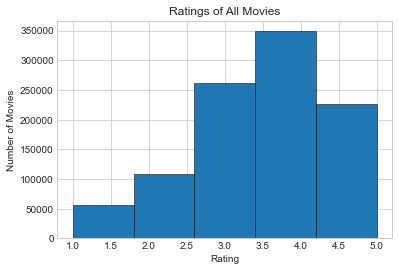

In [28]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------
import matplotlib.pyplot as plt

#Plot a histogram of the ratings of all movies
plt.style.use('seaborn-whitegrid')
plt.hist(rating['Rating'], bins = 5, edgecolor = '#000000', linewidth = 0.5)
plt.title('Ratings of All Movies')
plt.xlabel("Rating")
plt.ylabel("Number of Movies")

In [21]:
#Each entry per movieId is a rating
num_rating_per_movie = rating.value_counts("MovieID")
num_rating_per_movie = num_rating_per_movie.reset_index()
#Convert the series to a dataframe
df_rating_per_movie = pd.DataFrame(num_rating_per_movie)
#Rename column
df_rating_per_movie = df_rating_per_movie.rename(columns = {0:'Number of Ratings'})
df_rating_per_movie

,MovieID,Number of Ratings
0,2858,3428
1,260,2991
2,1196,2990
3,1210,2883
4,480,2672
...,...,...
3701,3237,1
3702,763,1
3703,624,1
3704,2563,1


In [13]:
#Because there are duplicates in the number of ratings i.e. multiple 1 values. Need to figure out how to properly bin.
df_rating_per_movie["Number of Ratings"].sum()

1000209

In [14]:
df_rating_per_movie["Number of Ratings"].mean()

269.88909875876953

Text(0, 0.5, 'Rating Count')

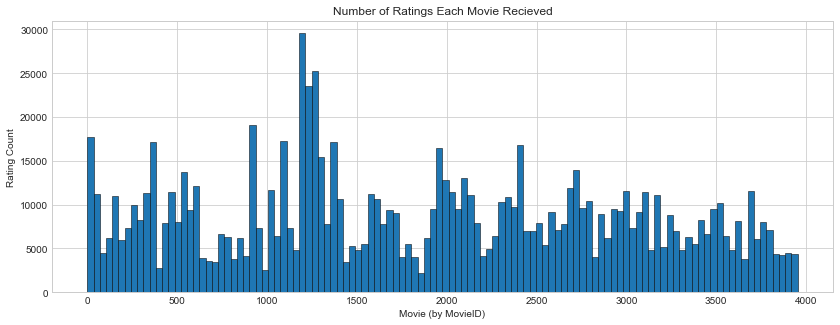

In [30]:
#Each entry per movieId is a rating
num_rating_per_movie = rating.value_counts("MovieID")
num_rating_per_movie = num_rating_per_movie.reset_index()
#Convert the series to a dataframe
df_rating_per_movie = pd.DataFrame(num_rating_per_movie)
#Rename column
df_rating_per_movie = df_rating_per_movie.rename(columns = {0:'Number of Ratings'})
#Plot a histogram of the number of ratings each movie recieved.
plt.figure(figsize=(14,5))
plt.style.use('seaborn-whitegrid')
plt.hist(rating["MovieID"], bins = "auto", edgecolor = '#000000', linewidth = 0.5)
plt.title("Number of Ratings Each Movie Recieved")
plt.xlabel("Movie (by MovieID)")
plt.ylabel("Rating Count")

In [16]:
#Plot a histogram of the average rating for each movie
#Get average rating per movie
avg_rating = rating.groupby('MovieID')['Rating'].mean()
#Convert to dataframe
df_avgRating = pd.DataFrame(avg_rating)
df_avgRating = df_avgRating.reset_index()
df_avgRating

,MovieID,Rating
0,1,4.146846
1,2,3.201141
2,3,3.016736
3,4,2.729412
4,5,3.006757
...,...,...
3701,3948,3.635731
3702,3949,4.115132
3703,3950,3.666667
3704,3951,3.900000


Text(0, 0.5, 'Frequency of Rating for Movies')

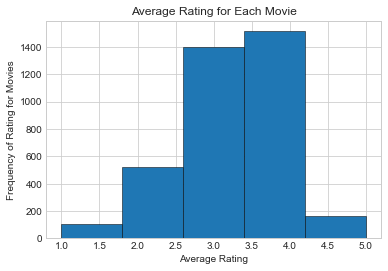

In [5]:
#Plot a histogram of the average rating for each movie
#Get average rating per movie
avg_rating = rating.groupby('MovieID')['Rating'].mean()
#Convert to dataframe
df_avgRating = pd.DataFrame(avg_rating)
#df_avgRating = df_avgRating.reset_index()
#Plot the histogram
plt.style.use('seaborn-whitegrid')
plt.hist(df_avgRating["Rating"], bins = 5, edgecolor = '#000000', linewidth = 0.5)
plt.title("Average Rating for Each Movie")
plt.xlabel("Average Rating")
plt.ylabel("Frequency of Rating for Movies")

In [18]:
df_avgRating

,Rating
MovieID,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757
...,...
3948,3.635731
3949,4.115132
3950,3.666667


In [156]:
import pandas as pd
import numpy as np
import statistics as stats
import matplotlib.pyplot as plt

rating = pd.read_csv('ratings.csv')
rating = rating.drop('Unnamed: 0', 1)

C:\Users\joshu\AppData\Local\Temp/ipykernel_10824/721283171.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  rating = rating.drop('Unnamed: 0', 1)


In [157]:
movie = pd.read_csv('movies.csv')
user = pd.read_csv('users.csv')

In [158]:
Data = pd.merge(rating, movie, on = "MovieID")
Data = pd.merge(Data, user, on = "UserID")

Text(0, 0.5, 'Movie (by MovieID)')

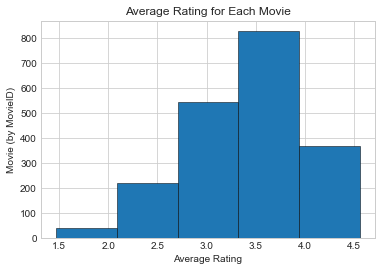

In [159]:
#Histogram 4
#Plot a histogram of the average rating for movies which are rated more than 100 times.

#Get average rating per movie
most_rated = rating.groupby('MovieID').agg({'Rating':[np.mean, np.size]})

#Check if movie was rated more than 100 times
check_100 = most_rated['Rating']['size'] > 100

#Return the average rating
atleast_100 = most_rated[check_100].sort_values([('Rating', 'mean')],ascending=False)

#Just get average
avg_rating_100 = atleast_100[('Rating', 'mean')]

#Convert to dataframe
df_avgRating_100 = pd.DataFrame(avg_rating_100)

#Plot the histogram
plt.style.use('seaborn-whitegrid')
plt.hist(df_avgRating_100["Rating"], bins = 5, edgecolor = '#000000', linewidth = 0.5)
plt.title("Average Rating for Each Movie")
plt.xlabel("Average Rating")
plt.ylabel("Movie (by MovieID)")

In [160]:
Data['Gender'].value_counts() # Data is skewed towards males, keep in mind when reporting results

M    753769
F    246440
Name: Gender, dtype: int64

In [161]:
Data.groupby('Gender')['Rating'].mean().sort_values(ascending=False) # Females are more likely to report a higher score 

Gender
F    3.620366
M    3.568879
Name: Rating, dtype: float64

In [162]:
Data.groupby('Gender')['Rating'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,246440.0,3.620366,1.111228,1.0,3.0,4.0,4.0,5.0
M,753769.0,3.568879,1.118724,1.0,3.0,4.0,4.0,5.0


In [163]:
GenderEqual = list(Data['Gender'])
GenderEqual
#GenderUnequal = list(Data[Data.Age >= 50].Rating)
# See if the variance is different.
#print("The variance of rating of users aged below 50 is",np.var(MovieRatingBelow50),"and the variance of rating of user aged above 50 is", np.var(MovieRatingAbove50),".")
# The variance is similar, thus assumpe equal variance when perfroming two sample t-test.
#stats.ttest_ind(a = MovieRatingBelow50, b = MovieRatingAbove50, equal_var = True, alternative = 'greater')

['F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'F',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M',
 'M'

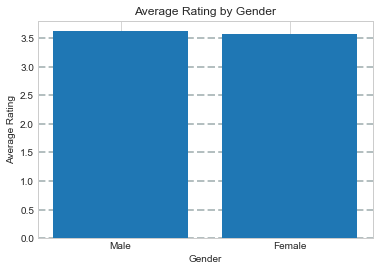

In [164]:
mean = Data.groupby('Gender')['Rating'].mean()
plt.bar(['Male', 'Female'], list(Data.groupby('Gender')['Rating'].mean()))
plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.7)
plt.xlabel("Gender")
plt.ylabel("Average Rating")
plt.title("Average Rating by Gender")
plt.show()

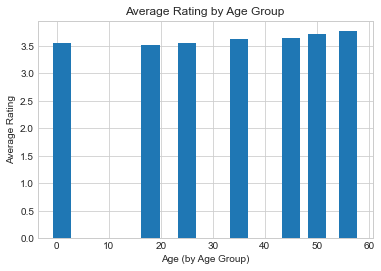

In [165]:
age_mean = Data.groupby('Age')['Rating'].mean()
index_age_mean = age_mean.reset_index()
plt.bar(list(index_age_mean['Age']), list(age_mean), width = 3.5)
plt.xlabel("Age (by Age Group)")
plt.ylabel("Average Rating")
plt.title("Average Rating by Age Group")
plt.show()

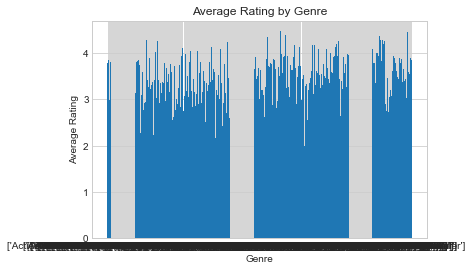

In [166]:
genre_mean = Data.groupby('Genres')['Rating'].mean()
genre = genre_mean.reset_index()
#print(list(genre['Genres']))
plt.bar(list(genre['Genres']), list(genre_mean))
#plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating by Genre")
plt.show()

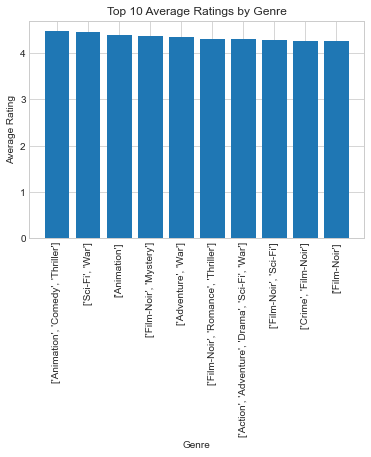

In [167]:
top_10_genre = genre.sort_values('Rating', ascending = False).groupby('Rating').head()
top_10_genre = top_10_genre.nlargest(10, 'Rating')
#print(list(top_10_genre['Genres']))
plt.bar(list(top_10_genre['Genres']), list(top_10_genre['Rating']))
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Top 10 Average Ratings by Genre")
plt.show()

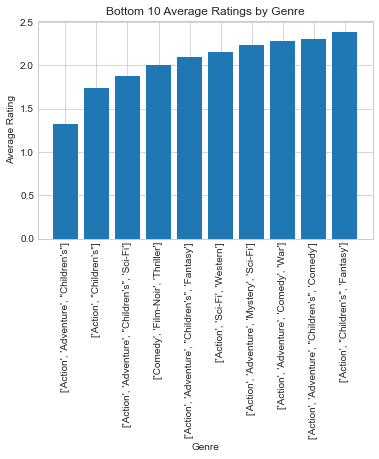

In [168]:
bottom_10_genre = genre.sort_values('Rating', ascending = True).groupby('Rating').head()
bottom_10_genre = bottom_10_genre.nsmallest(10, 'Rating')
#print(list(bottom_10_genre['Genres']))
plt.bar(list(bottom_10_genre['Genres']), list(bottom_10_genre['Rating']))
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Bottom 10 Average Ratings by Genre")
plt.show()

In [182]:
genre_rating = Data[['Genres', 'Rating']]
genre_rating
#animation = rating[rating['Genres'].str.contains("Animation")]
#animation

,Genres,Rating
0,['Drama'],5
1,"['Animation', ""Children's"", 'Musical']",3
2,"['Musical', 'Romance']",3
3,['Drama'],4
4,"['Animation', ""Children's"", 'Comedy']",5
...,...,...
1000204,['Drama'],2
1000205,['Western'],3
1000206,['Horror'],4
1000207,"['Action', 'War']",2


In [183]:
#Create dataset containing just ratings and genres with animation
animation = genre_rating[genre_rating['Genres'].str.contains("Animation")]
animation = animation[~animation['Genres'].str.contains('Children\'s')]

In [184]:
grouped_animation = animation.groupby("Genres")['Rating'].mean()
grouped_animation

Genres
['Action', 'Adventure', 'Animation', 'Horror', 'Sci-Fi']    3.546926
['Action', 'Adventure', 'Animation']                        4.147826
['Adventure', 'Animation', 'Film-Noir']                     3.679822
['Adventure', 'Animation', 'Sci-Fi', 'Thriller']            3.933628
['Adventure', 'Animation', 'Sci-Fi']                        3.381308
['Animation', 'Comedy', 'Thriller']                         4.473837
['Animation', 'Comedy']                                     3.985473
['Animation', 'Musical']                                    3.566055
['Animation', 'Mystery']                                    3.926829
['Animation', 'Sci-Fi']                                     3.945238
['Animation']                                               4.394336
Name: Rating, dtype: float64

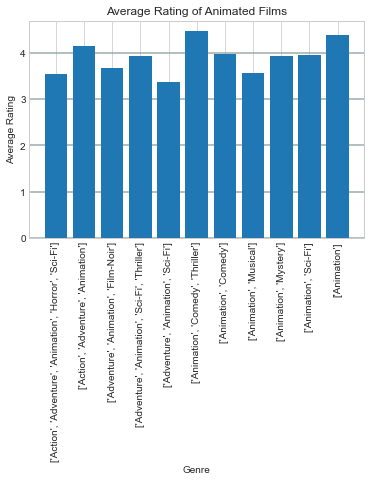

In [185]:
ani = grouped_animation.reset_index()

plt.grid(color='#95a5a6', linestyle='-', linewidth=2, axis='y', alpha=0.7)
plt.bar(list(ani['Genres']), list(ani['Rating']))
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating of Animated Films")
plt.show()

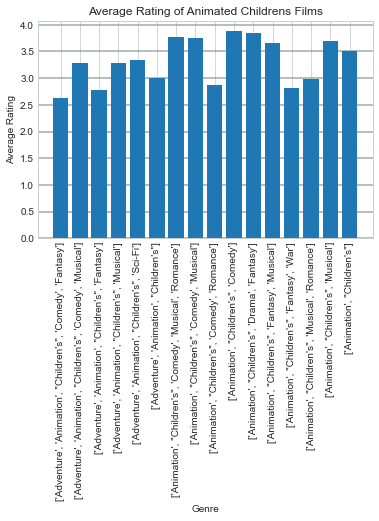

In [173]:
childrens_animation = genre_rating[genre_rating['Genres'].str.contains('Children\'s')]
childrens_animation = childrens_animation.groupby("Genres")['Rating'].mean()
childrens_animation = childrens_animation.reset_index()
childrens_animation = pd.DataFrame(childrens_animation)
childrens_animation = childrens_animation.drop(range(0, 39))
#childrens_animation

plt.grid(color='#95a5a6', linestyle='-', linewidth=2, axis='y', alpha=0.7)
plt.bar(list(childrens_animation['Genres']), list(childrens_animation['Rating']))
plt.xticks(rotation = 90)
plt.xlabel("Genre")
plt.ylabel("Average Rating")
plt.title("Average Rating of Animated Childrens Films")
plt.show()

*------------------------

# Problem 3: (20 points total)
## Correlation:  Men versus women

Let look more closely at the relationship between the pieces of data we have.

* (2 points) Make a scatter plot of men versus women and their mean rating for every movie.
* (2 points) Make a scatter plot of men versus women and their mean rating for movies rated more than 200 times.
* (6 points) Compute the *correlation coefficent* between the ratings of men and women.
    * What do you observe?
    * Are the ratings similiar or not? Support your answer with data!
* (10 points) Conjecture under what circumstances the rating given by one gender can be used to predict the rating given by the other gender.
    * For example, are men and women more similar when they are younger or older?
    * Be sure to come up with your own conjectures and support them with data!

In [5]:
#-------------------------------
# Your code goes here.
# Add as many cells as you need
#-------------------------------

# Problem 4: (10 points total)
## Open Ended Question:  Business Intelligence

* Do any of your conjectures in Problems 1, 2, and 3 provide insights that a movie company might be interested in?
* Propose a business question that you think this data can answer. 
* Suppose you are a Data Scientist at a movie company.  **Convince your boss that your conjecture is correct!**

####  \~\~ write here \~\~





# Report: communicate the results (15 points) 

Open ended. Should at least dicuss the following:

* What is the relationship between this topic and Business Intelligence?
    * How did you analyse the data?
    * What did you find in the data? 
    * What conjectures did you make and how did you support or disprove them using data?
    * Did you find anything suprising in the data?
    * What business decision do you think this data could help answer? Why?
    * The story of the group: How did each member help the group? This section should appear at the end and can essentially tell a story of how the case study started, the issues faced, how each member played a role and helped solve specific problems. ETC. ETC.
    
**Note**: Please include figures or tables in the report (**but no source code**). Should be minimum 8 pages.

# Slides (for 10 minutes of presentation) (15 points)


1. (3 points) Motivation about the data collection, why the topic is interesting to you. 

2. (8 points) Communicating Results (figure/table)

3. (4 points) Story telling (How all the parts (data, analysis, result) fit together as a story?)'

**Note**: Two teams will be randomly chosen to present in the class.

# Done

All set! 

**What do you need to submit?**

* **Notebook File**: Save this IPython notebook, and find the notebook file in your folder (for example, "groupname.ipynb"). This is the file you need to submit. Please make sure all the plotted tables and figures are in the notebook.

* **PPT Slides**

* **Report**

Put the Jupyter Notebook file, the report (in PDF) and PPT slides (converted to PDF) in a folder. Zip the folder. After zipping, it should have the extension .zip. The name of the .zip file should be casestudy_3_groupname.zip. Upload the .zip file on Canvas.
        
**Note: Each team just needs to make one submission**